Foram realizadas 50 simulações independentes, cada uma com 50 observações, para um tipo de dado enviesado. Após a coleta dos dados, foi realizada uma etapa de limpeza dos mesmos. Em seguida, o cálculo da média foi feito utilizando duas abordagens diferentes: uma forma mais complexa e outra mais direta e simples.

Por fim, os valores das médias calculadas foram utilizados para criar um histograma. O histograma permite visualizar a distribuição das médias e analisar a sua concentração em determinadas faixas. Essa representação gráfica ajuda a compreender melhor a natureza dos dados e identificar padrões ou tendências.

Em resumo, o processo envolveu a simulação dos dados, a limpeza dos mesmos, o cálculo da média de duas formas distintas e a criação de um histograma para visualização das médias.

In [136]:
# Importando pacotes que irei utilizar

import pandas as pd
import numpy as np
from pathlib import Path

In [137]:
# Define o caminho base
base_path = Path.cwd()

# Define o caminho relativo para o arquivo de dados em excel 
dados = base_path  / "Exercício6e7_vic.xlsx"

df = pd.read_excel(dados, sheet_name = "dado viciado")

# deletando colunas 3 e 4
df = df.drop(df.columns[[2, 3]], axis = 1)

# renomeando coluna 1 e 2
df = df.rename(columns = {"Unnamed: 1" : "Probabilidade", "Dado não viciado" : "Valores"})

# Subir as linhas da primeira e segunda coluna
df['Valores'][:-1] = df['Valores'][1:].values
df['Probabilidade'][:-1] = df['Probabilidade'][1:].values

df

C:\Users\Cliente\AppData\Local\Temp\ipykernel_9020\3720532087.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valores'][:-1] = df['Valores'][1:].values
C:\Users\Cliente\AppData\Local\Temp\ipykernel_9020\3720532087.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Probabilidade'][:-1] = df['Probabilidade'][1:].values


,Valores,Probabilidade,Serie 1,Serie2,Serie 3,Serie 4,Serie 5,Serie 6,Serie 7,Serie 8,...,Serie 41,Serie 42,Serie 43,Serie 44,Serie 45,Serie 46,Serie 47,Serie 48,Serie 49,Serie 50
0,1,0.047619,3,5,5,4,2,3,6,2,...,4,3,4,2,4,1,4,4,6,3
1,2,0.095238,4,4,5,2,3,3,1,2,...,2,2,4,5,6,6,5,5,6,2
2,3,0.142857,2,5,1,6,6,4,3,2,...,6,5,3,4,3,6,3,6,6,6
3,4,0.190476,5,5,6,4,3,3,5,6,...,2,3,4,1,2,5,6,2,4,4
4,5,0.238095,3,3,4,4,3,3,5,4,...,6,6,3,6,1,6,6,4,5,3
5,6,0.285714,6,4,6,5,4,5,6,4,...,6,1,5,5,1,6,6,5,6,6
6,NaN,NaN,1,3,1,6,4,6,3,3,...,3,5,5,3,2,3,3,4,4,4
7,NaN,NaN,3,5,5,3,6,5,4,6,...,4,5,5,4,3,4,4,6,5,6
8,NaN,NaN,2,5,1,5,6,5,2,6,...,5,6,5,6,1,1,6,4,3,3
9,NaN,NaN,5,4,4,6,4,6,2,1,...,2,4,5,4,3,6,5,5,2,4


In [138]:
from colorama import Fore, Style

def calcular_esperanca():
    resultados = {}  # Dicionário para armazenar os resultados
    
    for coluna in df.columns[2:]:
        soma = 0
        soma_pesos = 0  # Variável para armazenar a soma dos pesos
        
        for valor in df[coluna]:
            if valor == 1: 
                peso = 0.047619
            elif valor == 2:
                peso = 0.095238
            elif valor == 3:
                peso = 0.142857
            elif valor == 4:
                peso = 0.190476	
            elif valor == 5:
                peso = 0.238095
            else:
                peso = 0.285714

            op = valor * peso
            soma += op
            soma_pesos += peso
        
        media_ponderada = soma / soma_pesos  # Calcular a média ponderada da coluna 
        resultados[f"Média Ponderada da {coluna}"] = media_ponderada  # Armazenar a média ponderada da coluna
    
    return resultados

if __name__ == "__main__":
    dict_resultados = calcular_esperanca()
    # Imprimir os resultados para cada coluna
    for coluna, resultados in dict_resultados.items():
        print(f"{coluna} é {Fore.BLUE}{resultados}{Style.RESET_ALL}")
        


Média Ponderada da Serie 1 é 4.8349514563106775
Média Ponderada da Serie2 é 4.607843137254901
Média Ponderada da Serie 3 é 4.851162790697673
Média Ponderada da Serie 4 é 4.8165137614678875
Média Ponderada da Serie 5 é 4.830985915492955
Média Ponderada da Serie 6 é 4.615763546798026
Média Ponderada da Serie 7 é 4.742574257425741
Média Ponderada da Serie 8 é 4.768844221105524
Média Ponderada da Serie 9 é 4.682692307692305
Média Ponderada da Serie 10 é 4.824884792626724
Média Ponderada da Serie 11 é 4.79695431472081
Média Ponderada da Serie 12 é 5.018099547511309
Média Ponderada da Serie 13 é 5.0259740259740235
Média Ponderada da Serie 14 é 4.653465346534651
Média Ponderada da Serie 15 é 4.929824561403506
Média Ponderada da Serie 16 é 4.719457013574657
Média Ponderada da Serie 17 é 4.963636363636359
Média Ponderada da Serie 18 é 4.63451776649746
Média Ponderada da Serie 19 é 4.624413145539903
Média Ponderada da Serie 20 é 4.844036697247703
Média Ponderada da Serie 21 é 4.892376681614347
M

Calculando a esperança da coluna de um jeito diferente e mais direto. 

A esperança da coluna Serie 1 é: 4.83495145631068
A esperança da coluna Serie2 é: 4.6078431372549025
A esperança da coluna Serie 3 é: 4.851162790697676
A esperança da coluna Serie 4 é: 4.81651376146789
A esperança da coluna Serie 5 é: 4.830985915492958
A esperança da coluna Serie 6 é: 4.61576354679803
A esperança da coluna Serie 7 é: 4.742574257425744
A esperança da coluna Serie 8 é: 4.768844221105526
A esperança da coluna Serie 9 é: 4.682692307692307
A esperança da coluna Serie 10 é: 4.824884792626728
A esperança da coluna Serie 11 é: 4.7969543147208125
A esperança da coluna Serie 12 é: 5.018099547511311
A esperança da coluna Serie 13 é: 5.025974025974027
A esperança da coluna Serie 14 é: 4.653465346534654
A esperança da coluna Serie 15 é: 4.929824561403509
A esperança da coluna Serie 16 é: 4.719457013574661
A esperança da coluna Serie 17 é: 4.963636363636365
A esperança da coluna Serie 18 é: 4.634517766497462
A esperança da coluna Serie 19 é: 4.624413145539907
A esperança da coluna S

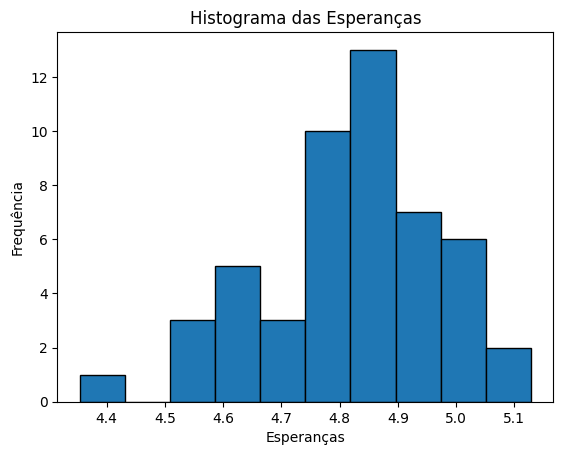

In [139]:
import matplotlib.pyplot as plt

# Mapeamento das probabilidades
mapeamento_probabilidade = dict(zip(df['Valores'], df['Probabilidade']))

def calcular_esperanca_2():
    esperancas = []
    for coluna in df.columns[2:]:
        # Itera sobre as colunas a partir da terceira coluna
        # (assume-se que as duas primeiras colunas não são relevantes para o cálculo da esperança)

        esperanca = df[coluna].apply(lambda x: x * mapeamento_probabilidade.get(x, 0)).sum()
        # Calcula a soma ponderada dos valores da coluna, onde cada valor é multiplicado
        # pelo seu respectivo peso definido no dicionário 'mapeamento_probabilidade'.
        # Caso o valor não esteja presente no dicionário, assume-se o peso zero.

        pesos = df[coluna].apply(lambda x: mapeamento_probabilidade.get(x, 0)).sum()
        # Calcula a soma dos pesos para normalização posterior.
        # Novamente, cada valor é mapeado para o seu respectivo peso no dicionário.
        # Se o valor não estiver presente, assume-se o peso zero.

        esperanca_ = esperanca / pesos
        # Calcula a esperança dividindo a soma ponderada dos valores pela soma dos pesos.

        # adicionando os valores da esperança em uma lista
        esperancas.append(esperanca_)

        print(f"A esperança da coluna {coluna} é: {esperanca_}")
        # Imprime o valor da esperança para a coluna atual.

    return esperancas

if __name__ == "__main__":
    esperancas = calcular_esperanca_2()

    plt.hist(esperancas, bins=10, range=(min(esperancas), max(esperancas)), edgecolor='black')
    plt.xlabel('Esperanças')
    plt.ylabel('Frequência')
    plt.title('Histograma das Esperanças')
    plt.show()


# Conclusão:


Ao analisar o histograma das esperanças calculadas a partir das 50 simulações, podemos observar que há uma concentração predominante de valores à direita da média dos dados não viciados, que seria 3. Isso é coerente com a situação em que a probabilidade de ocorrer valores acima de 3 é maior, o que influencia no cálculo das esperanças. Essa conclusão sugere a presença de um viés ou efeito de vício nos dados, resultando em esperanças tendendo a ser maiores do que a média esperada.